## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

In [2]:
import pandas as pd
import numpy  as np

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [3]:
file_name = '~/data/data_000637.txt'
#Total number of rows: 131072
df=pd.read_csv(file_name, nrows=1000000)
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
999995,1,0,62,3869209011,2560,29
999996,1,0,51,3869209011,2561,12
999997,1,0,61,3869209011,2562,2
999998,1,0,50,3869209011,2563,4


2\. Find out the number of BX in a ORBIT (the value 'x').

In [4]:
#Orbit counter is increased every 'x' BX count
x=df['BX_COUNTER'].max()+1
print('Value of \'x\':',x)

Value of 'x': 3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [5]:
# check precisely by reading out the whole dataset
whole_df=pd.read_csv(file_name)
delta_orbit_whole = whole_df['ORBIT_CNT'].max() - whole_df['ORBIT_CNT'].min()
time_whole = (25. * x * delta_orbit_whole)*10e-9
print('Time estimation with whole dataset: ', time_whole)

# estimate based on the fraction of the read measurements
delta_orbit = df['ORBIT_CNT'].max() - df['ORBIT_CNT'].min()
time = (len(whole_df)/len(df)) * (25. * x * delta_orbit)*10e-9
print('Time estimation with partial dataset: ', time)
#print(len(df.index))


Time estimation with whole dataset:  9.804564000000001
Time estimation with partial dataset:  10.328478842880001


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [6]:
df['TIME']=(df['ORBIT_CNT']*(25*3564)+df['BX_COUNTER']*25+df['TDC_MEAS']*(25/30))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
999995,1,0,62,3869209011,2560,29,3.447465e+14
999996,1,0,51,3869209011,2561,12,3.447465e+14
999997,1,0,61,3869209011,2562,2,3.447465e+14
999998,1,0,50,3869209011,2563,4,3.447465e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [12]:
df['HEAD']=(pd.Series(np.random.randint(2,size=len(df))))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,0,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,0,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
999995,1,0,62,3869209011,2560,29,3.447465e+14
999996,0,0,51,3869209011,2561,12,3.447465e+14
999997,1,0,61,3869209011,2562,2,3.447465e+14
999998,1,0,50,3869209011,2563,4,3.447465e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [13]:
new_df=df[df['HEAD']==1]
new_df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
5,1,0,63,3869200167,2762,4,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
8,1,0,62,3869200167,2774,21,3.447457e+14
...,...,...,...,...,...,...,...
999991,1,0,59,3869209011,2558,9,3.447465e+14
999993,1,0,123,3869209011,2553,13,3.447465e+14
999995,1,0,62,3869209011,2560,29,3.447465e+14
999997,1,0,61,3869209011,2562,2,3.447465e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

array([[<AxesSubplot:title={'center':'FPGA_1'}>]], dtype=object)

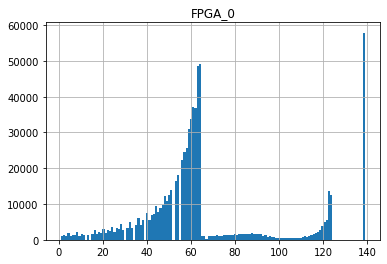

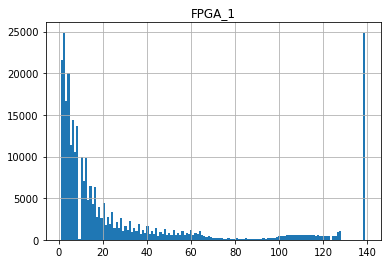

In [19]:
df_FPGA0 = df[df['FPGA']==0]
df_FPGA0=df_FPGA0.rename({'TDC_CHANNEL':'FPGA_0'}, axis='columns')
df_FPGA0.hist('FPGA_0',bins=df_FPGA0['FPGA_0'].max())

df_FPGA1 = df[df['FPGA']==1]
df_FPGA1=df_FPGA1.rename({'TDC_CHANNEL':'FPGA_1'}, axis='columns')
df_FPGA1.hist('FPGA_1',bins=df_FPGA1['FPGA_1'].max())

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [27]:
#For both FPGAs:
noise_df=df.groupby(['TDC_CHANNEL']).sum()
print('Noisy channels for both FPGAs')
print(noise_df['HEAD'].nlargest(3),'\n')

#For FPGA_0:
noise_df=df[df['FPGA']==0].groupby(['TDC_CHANNEL']).sum()
noise_df=noise_df.groupby(['TDC_CHANNEL']).sum()
print('Noisy channels for FPGA 0')
print(noise_df['HEAD'].nlargest(3),'\n')

noise_df=df[df['FPGA']==1].groupby(['TDC_CHANNEL']).sum()
noise_df=noise_df.groupby(['TDC_CHANNEL']).sum()
print('Noisy channels for FPGA 1')
print(noise_df['HEAD'].nlargest(3))

Noisy channels for both FPGAs
TDC_CHANNEL
139    41377
64     25152
63     24698
Name: HEAD, dtype: int64 

Noisy channels for FPGA 0
TDC_CHANNEL
139    28918
64     24616
63     24338
Name: HEAD, dtype: int64 

Noisy channels for FPGA 1
TDC_CHANNEL
139    12459
2      12361
1      10926
Name: HEAD, dtype: int64


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [37]:
uniq_orbits=df['ORBIT_CNT'].unique()
print('Number of unique orbits: ', len(uniq_orbits))

df_139=df[df['TDC_CHANNEL']==139]
uniq_139_orbits=df_139['ORBIT_CNT'].unique()
print('Number of unique orbits with at least one measurement from TDC_CHANNEL=139:', len(uniq_139_orbits))

Number of unique orbits:  8841
Number of unique orbits with at least one measurement from TDC_CHANNEL=139: 8816
